In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [4]:
#The line `from sklearn.preprocessing import StandardScaler` is importing the `StandardScaler` class from the `sklearn.preprocessing` module. This class is used for standardizing features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

In [5]:
#The code is performing standardization on a DataFrame `df`.
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_df)

df_scaled.head(10)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
5,-0.789272,0.827377,-0.104637,-0.478116
6,-0.789272,-1.566107,1.893459,0.395814
7,-0.789272,0.827377,-2.102733,-0.224083
8,1.266990,0.827377,-0.181487,-0.424256
9,1.266990,-0.369365,-1.180535,-0.042956


<Axes: xlabel='1', ylabel='Count'>

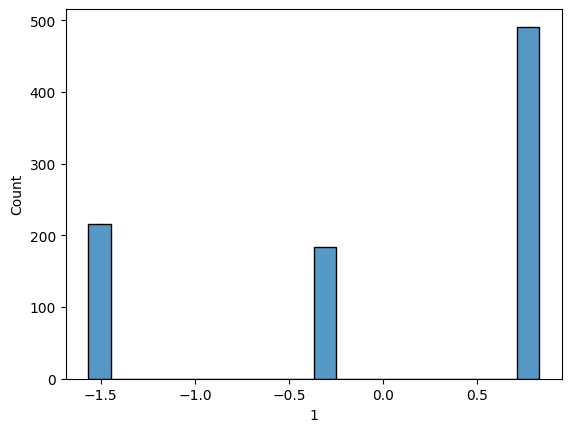

In [6]:
sns.histplot(x=df_scaled[1],bins=20)

<Axes: xlabel='2', ylabel='Count'>

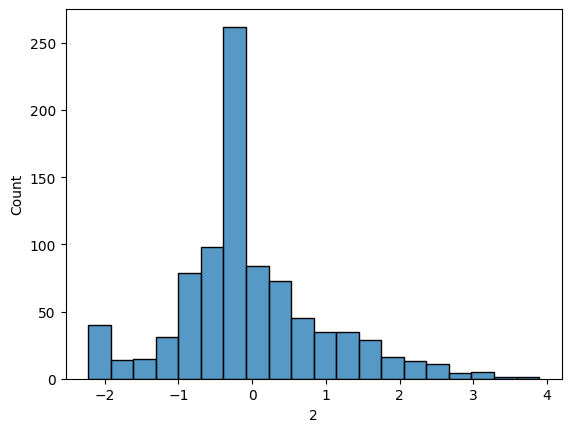

In [7]:
sns.histplot(x=df_scaled[2],bins=20)

<Axes: xlabel='3', ylabel='Count'>

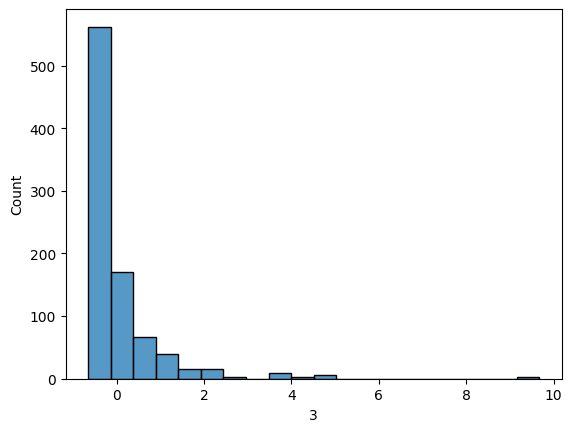

In [8]:
sns.histplot(x=df_scaled[3],bins=20)

In [9]:
#This code is performing feature scaling using the Min-Max scaling technique.
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


<Axes: xlabel='Pclass', ylabel='Count'>

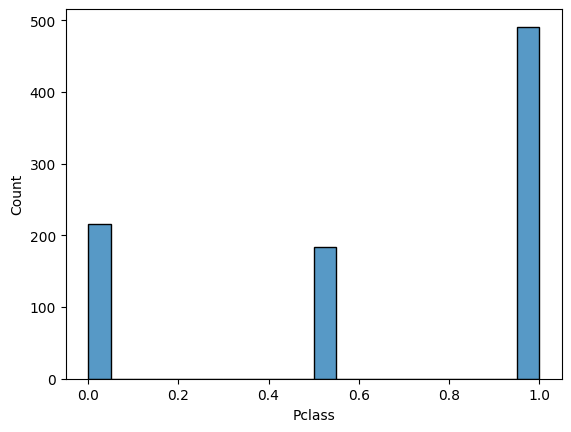

In [10]:
sns.histplot(x=df_minmax['Pclass'],bins=20)

<Axes: xlabel='Age', ylabel='Count'>

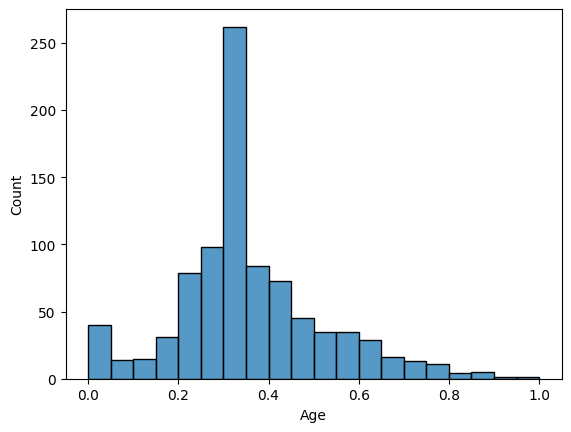

In [11]:
sns.histplot(x=df_minmax['Age'],bins=20)

<Axes: xlabel='Fare', ylabel='Count'>

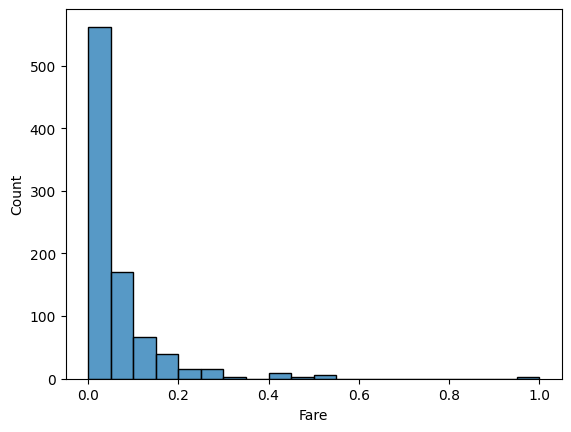

In [12]:
sns.histplot(x=df_minmax['Fare'],bins=20)

In [13]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
robust_df = pd.DataFrame(robust.fit_transform(df),columns=df.columns)
robust_df.head(10)

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
5,0.0,0.0,0.000000,-0.259680
6,0.0,-2.0,2.000000,1.620136
7,0.0,0.0,-2.000000,0.286744
8,1.0,0.0,-0.076923,-0.143827
9,1.0,-1.0,-1.076923,0.676348


<Axes: xlabel='Pclass', ylabel='Count'>

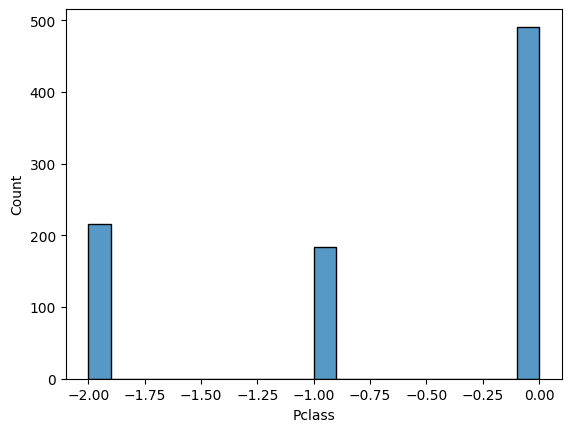

In [14]:
sns.histplot(x=robust_df['Pclass'],bins=20)

<Axes: xlabel='Age', ylabel='Count'>

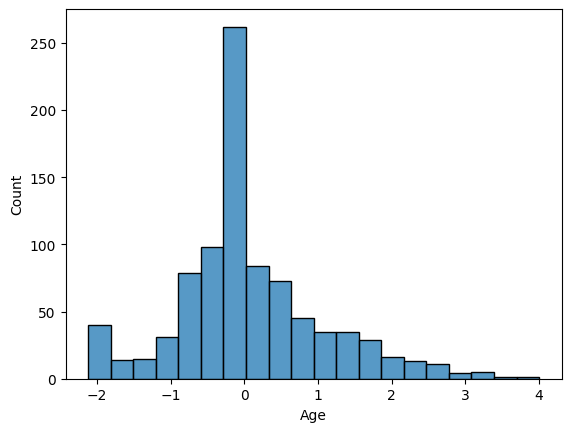

In [15]:
sns.histplot(x=robust_df['Age'],bins=20)

<Axes: xlabel='Fare', ylabel='Count'>

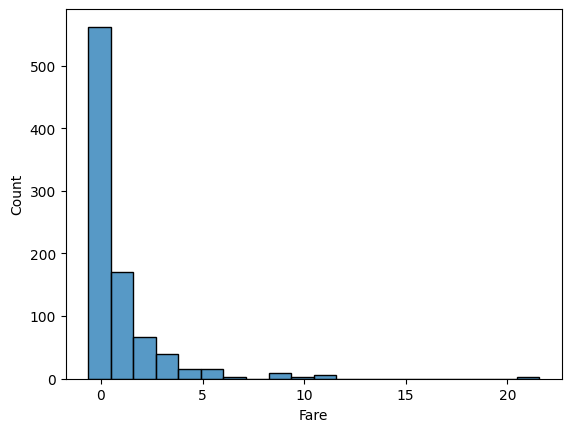

In [16]:
sns.histplot(x=robust_df['Fare'],bins=20)

### Gaussian Transformation
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation
- box-cox transformation

In [38]:
import scipy.stats as stat
import pylab

In [39]:
df = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [40]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [41]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [50]:
#The code defines a function called `plot_data` that takes two parameters: `df` and `feature`.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(x=df[feature],kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

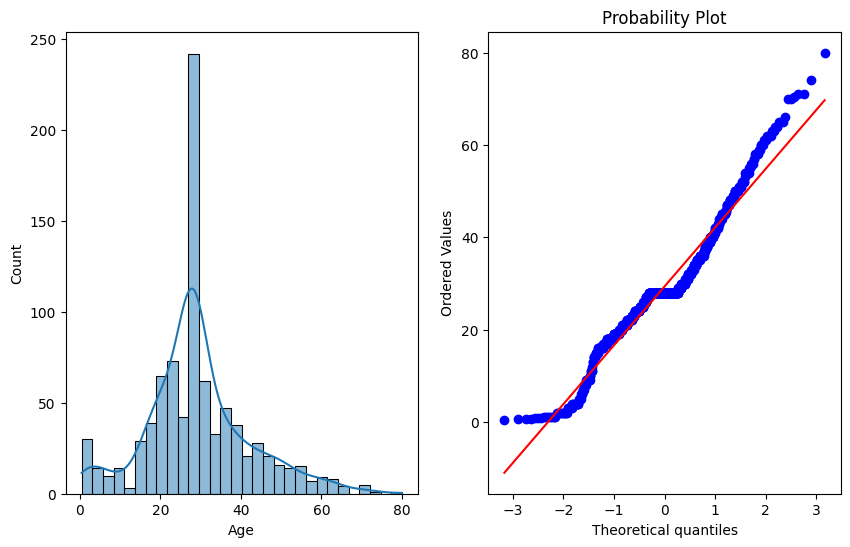

In [51]:
plot_data(df,'Age')

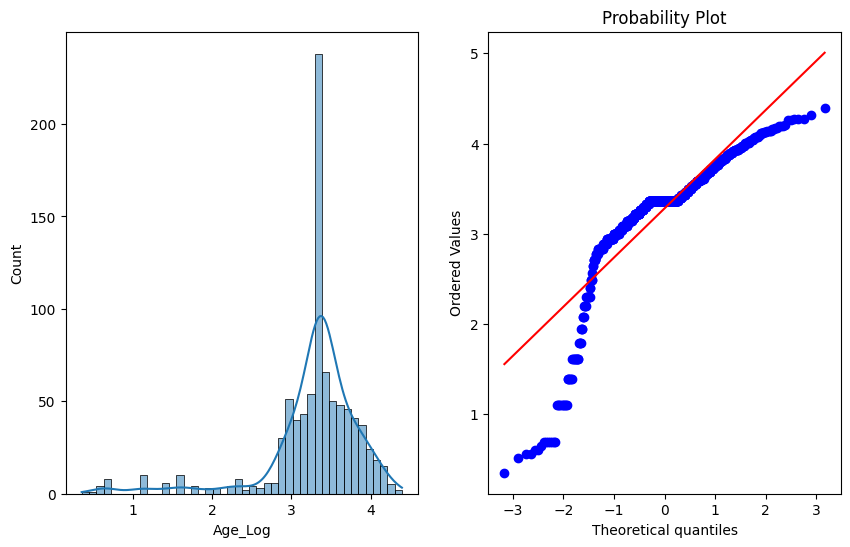

In [52]:
#The code `df['Age_Log'] = np.log1p(df['Age'])` is creating a new column in the DataFrame `df` called 'Age_Log'. 
# This new column contains the natural logarithm (base e) of the values in the 'Age' column.
df['Age_Log'] = np.log1p(df['Age'])
plot_data(df,'Age_Log')

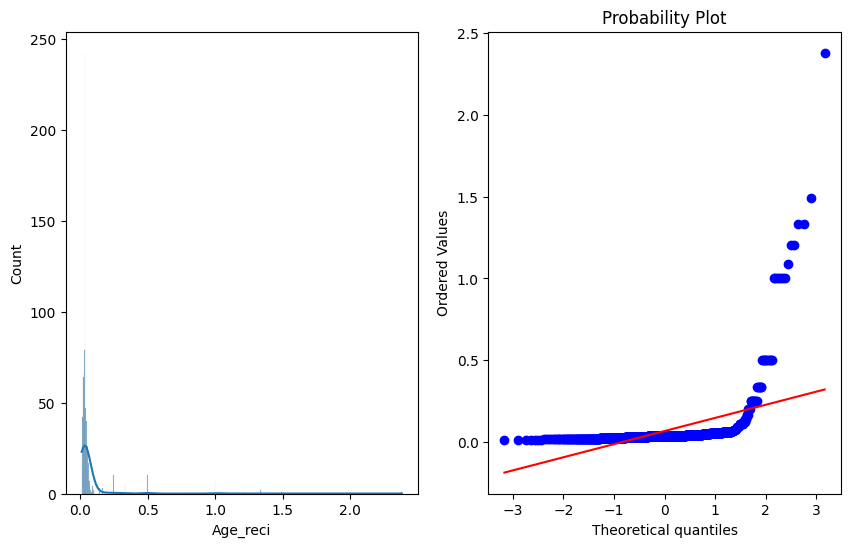

In [53]:
#The code `df['Age_reci'] = np.reciprocal(df['Age'])` is creating a new column in the DataFrame `df` called 'Age_reci'. 
# This new column contains the reciprocal values of the 'Age' column.
df['Age_reci'] = np.reciprocal(df['Age'])
plot_data(df,'Age_reci')

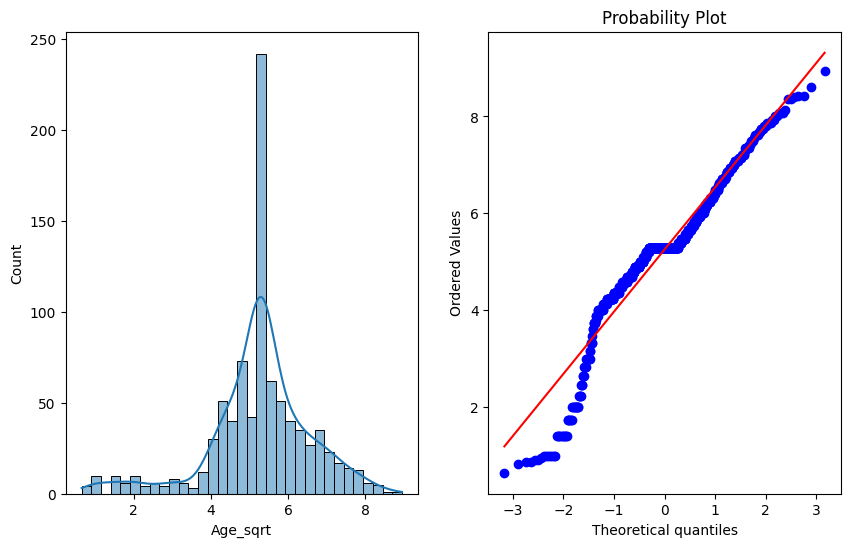

In [54]:
#The code `df['Age_sqrt'] = np.sqrt(df['Age'])` is calculating the square root of the values in the 'Age' column of the DataFrame `df` and assigning the result to a new column called 'Age_sqrt' in the same DataFrame.
df['Age_sqrt'] = np.sqrt(df['Age'])
plot_data(df,'Age_sqrt')

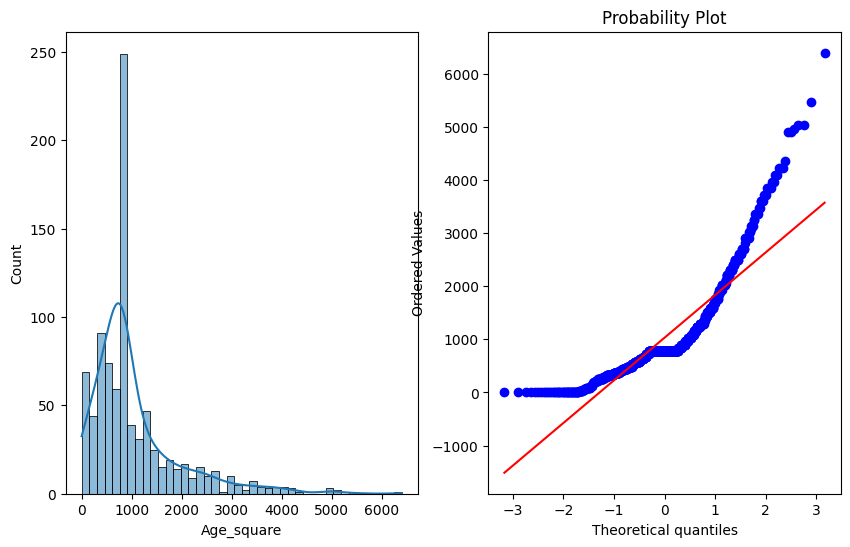

In [55]:
#The code `df['Age_square'] = np.square(df['Age'])` is creating a new column in the DataFrame `df` called 'Age_square'. 
# This new column contains the square of the values in the 'Age' column.
df['Age_square'] = np.square(df['Age'])
plot_data(df,'Age_square')

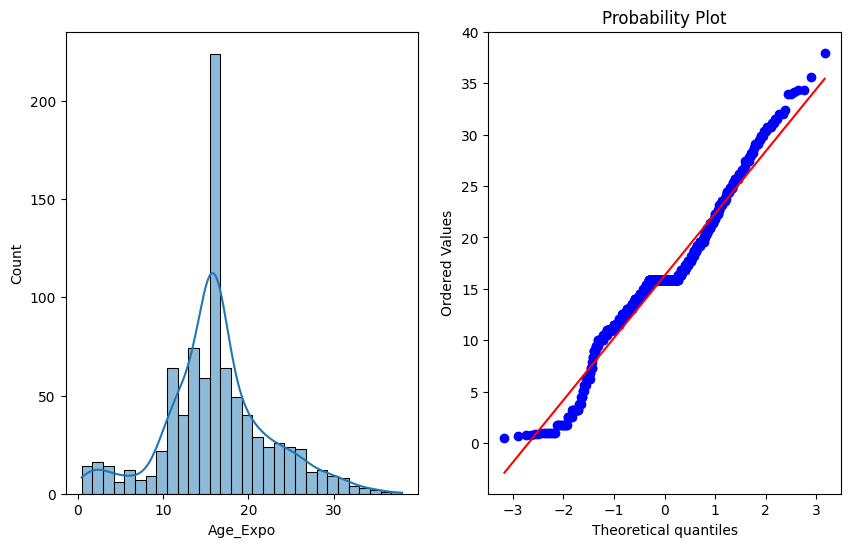

In [56]:
#The code `df['Age_Expo'] = pow(df['Age'],0.83)` is creating a new column in the DataFrame `df` called 'Age_Expo'. 
# The values in this new column are calculated by raising the values in the 'Age' column to the power of 0.83.
df['Age_Expo'] = pow(df['Age'],0.83)
plot_data(df,'Age_Expo')

#### BoxCox Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

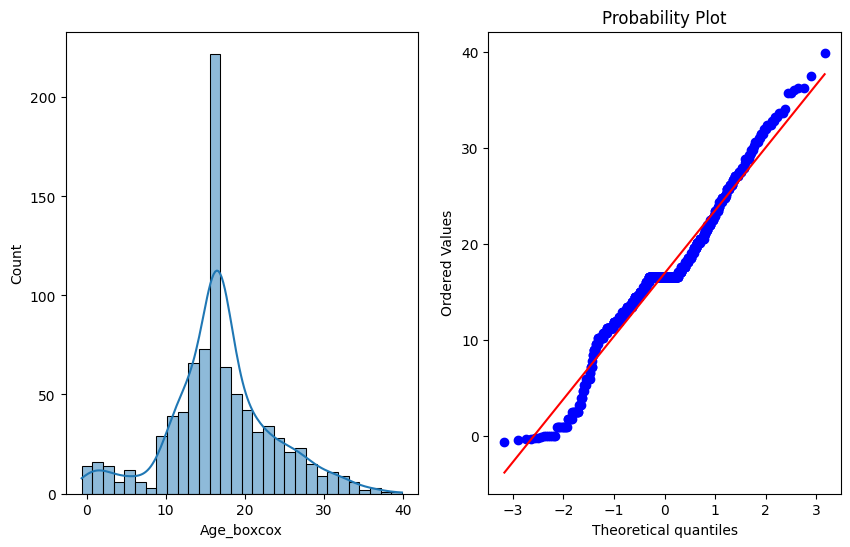

In [57]:
df['Age_boxcox'], parameters = stat.boxcox(df['Age'])
plot_data(df,'Age_boxcox')